# The Sparks Foundation - Data Science & Business Analytics Internship

## TASK 6:Predcition using Deceision Tree Algorithm

In this task it is required to create the Decision Tree classifier and visualize it graphically.
The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

### Importing Needed Packages

In [19]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
sns.set()

# To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

### Downloading the Data

In [20]:
df = pd.read_csv(r"C:\Users\samki\Downloads\data\owid-covid-data.csv")

In [21]:
#Take a look at dataset
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [22]:
#Take a look at dataset

df.tail(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
74637,ZWE,Africa,Zimbabwe,2021-03-04,36223.0,44.0,32.714,1483.0,5.0,3.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74638,ZWE,Africa,Zimbabwe,2021-03-05,36248.0,25.0,29.143,1484.0,1.0,3.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74639,ZWE,Africa,Zimbabwe,2021-03-06,36260.0,12.0,28.857,1485.0,1.0,3.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74640,ZWE,Africa,Zimbabwe,2021-03-07,36271.0,11.0,26.000,1485.0,0.0,3.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74641,ZWE,Africa,Zimbabwe,2021-03-08,36289.0,18.0,24.857,1487.0,2.0,2.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74642,ZWE,Africa,Zimbabwe,2021-03-09,36321.0,32.0,24.714,1489.0,2.0,2.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74643,ZWE,Africa,Zimbabwe,2021-03-10,36341.0,20.0,23.143,1489.0,0.0,1.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74644,ZWE,Africa,Zimbabwe,2021-03-11,36377.0,36.0,22.000,1492.0,3.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74645,ZWE,Africa,Zimbabwe,2021-03-12,36423.0,46.0,25.000,1496.0,4.0,1.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74646,ZWE,Africa,Zimbabwe,2021-03-13,36471.0,48.0,30.143,1501.0,5.0,2.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


### Data Exploration

In [23]:
#Summarize the data

df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,7.352000e+04,73518.000000,72517.000000,6.430100e+04,64459.000000,72517.000000,73119.000000,73117.000000,72121.000000,63913.000000,...,68003.000000,46404.000000,68627.000000,69499.000000,53935.000000,53194.000000,34447.000000,62802.000000,70930.000000,68569.000000
mean,6.518087e+05,5169.758386,5178.409235,1.930039e+04,132.163018,116.224025,7732.792871,66.841318,66.664590,181.909744,...,19150.950608,13.281853,257.227104,7.797553,10.549611,32.648191,51.001655,3.035891,73.141967,0.727852
std,4.581373e+06,32310.501694,32004.002243,1.129571e+05,723.633343,660.778926,15221.930393,168.615009,141.732909,323.768425,...,19746.932099,19.922717,118.470053,3.940771,10.409933,13.466378,31.767787,2.467250,7.551888,0.150155
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,7.210000e+02,2.000000,5.857000,3.800000e+01,0.000000,0.000000,148.830000,0.140000,1.007000,5.716000,...,4466.507000,0.500000,167.295000,5.290000,1.900000,21.600000,20.859000,1.300000,67.880000,0.602000
50%,8.088500e+03,59.000000,71.857000,2.510000e+02,2.000000,1.000000,1080.899000,6.398000,8.480000,31.026000,...,12951.839000,2.000000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.530000,0.748000
75%,8.703950e+04,674.000000,699.714000,2.399000e+03,16.000000,12.286000,7180.752000,57.313000,64.390000,193.422000,...,27216.445000,21.200000,329.635000,10.080000,19.300000,41.100000,83.241000,4.000000,78.730000,0.848000
max,1.195151e+08,880902.000000,739564.429000,2.648161e+06,17891.000000,14418.714000,145318.061000,8652.658000,2648.773000,2268.843000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.957000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74647 entries, 0 to 74646
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               74647 non-null  object 
 1   continent                              70959 non-null  object 
 2   location                               74647 non-null  object 
 3   date                                   74647 non-null  object 
 4   total_cases                            73520 non-null  float64
 5   new_cases                              73518 non-null  float64
 6   new_cases_smoothed                     72517 non-null  float64
 7   total_deaths                           64301 non-null  float64
 8   new_deaths                             64459 non-null  float64
 9   new_deaths_smoothed                    72517 non-null  float64
 10  total_cases_per_million                73119 non-null  float64
 11  ne

### Droping the Duplicates rows

In [25]:
df.shape

(74647, 59)

In [26]:
duplicate_rows_df = df[df.duplicated()]

print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 59)


In [27]:
df.count() #Used to count the number of rows

iso_code                                 74647
continent                                70959
location                                 74647
date                                     74647
total_cases                              73520
new_cases                                73518
new_cases_smoothed                       72517
total_deaths                             64301
new_deaths                               64459
new_deaths_smoothed                      72517
total_cases_per_million                  73119
new_cases_per_million                    73117
new_cases_smoothed_per_million           72121
total_deaths_per_million                 63913
new_deaths_per_million                   64071
new_deaths_smoothed_per_million          72121
reproduction_rate                        60024
icu_patients                              7759
icu_patients_per_million                  7759
hosp_patients                             9337
hosp_patients_per_million                 9337
weekly_icu_ad

In [28]:
#df = df.drop_duplicates()

#df.head()

In [29]:
#df.count()

### Checking the Missing or Null values

In [30]:
print(df.isnull().sum())

iso_code                                     0
continent                                 3688
location                                     0
date                                         0
total_cases                               1127
new_cases                                 1129
new_cases_smoothed                        2130
total_deaths                             10346
new_deaths                               10188
new_deaths_smoothed                       2130
total_cases_per_million                   1528
new_cases_per_million                     1530
new_cases_smoothed_per_million            2526
total_deaths_per_million                 10734
new_deaths_per_million                   10576
new_deaths_smoothed_per_million           2526
reproduction_rate                        14623
icu_patients                             66888
icu_patients_per_million                 66888
hosp_patients                            65310
hosp_patients_per_million                65310
weekly_icu_ad

In [31]:
#If you finds missing values in your data then remove it's by using following steps

#df = df.dropna() #Droping the missing values

#df.count()

In [32]:
#print(df.isnull().sum()) #After dropping the values

In [33]:
df1 = df[["date", "total_cases", "new_cases", "total_deaths", "new_tests", "total_tests"]]

df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2020-02-24,1.0,1.0,NaN,NaN,NaN
1,2020-02-25,1.0,0.0,NaN,NaN,NaN
2,2020-02-26,1.0,0.0,NaN,NaN,NaN
3,2020-02-27,1.0,0.0,NaN,NaN,NaN
4,2020-02-28,1.0,0.0,NaN,NaN,NaN


In [34]:
df1.date = pd.to_datetime(df.date)
df1.set_index('date', inplace = True)

In [35]:
df1.head()

,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2020-02-24,1.0,1.0,NaN,NaN,NaN
2020-02-25,1.0,0.0,NaN,NaN,NaN
2020-02-26,1.0,0.0,NaN,NaN,NaN
2020-02-27,1.0,0.0,NaN,NaN,NaN
2020-02-28,1.0,0.0,NaN,NaN,NaN


In [36]:
df1.tail()

,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2021-03-09,36321.0,32.0,1489.0,2056.0,396854.0
2021-03-10,36341.0,20.0,1489.0,2164.0,399018.0
2021-03-11,36377.0,36.0,1492.0,1706.0,400724.0
2021-03-12,36423.0,46.0,1496.0,NaN,NaN
2021-03-13,36471.0,48.0,1501.0,NaN,NaN


Text(0.5, 0, 'Month')

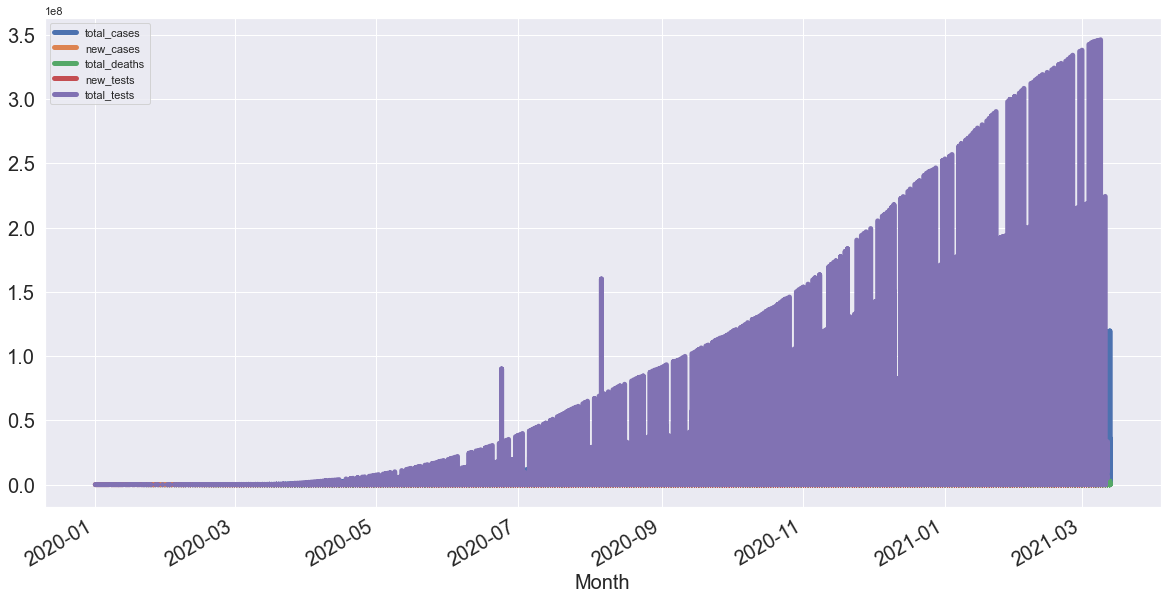

In [37]:
df1.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

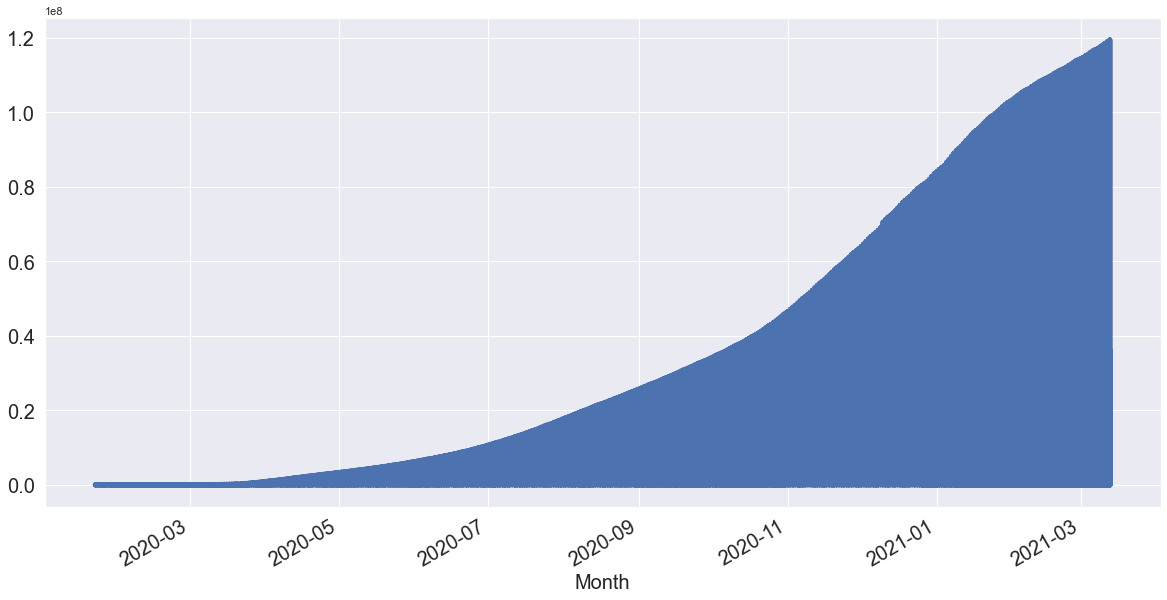

In [38]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

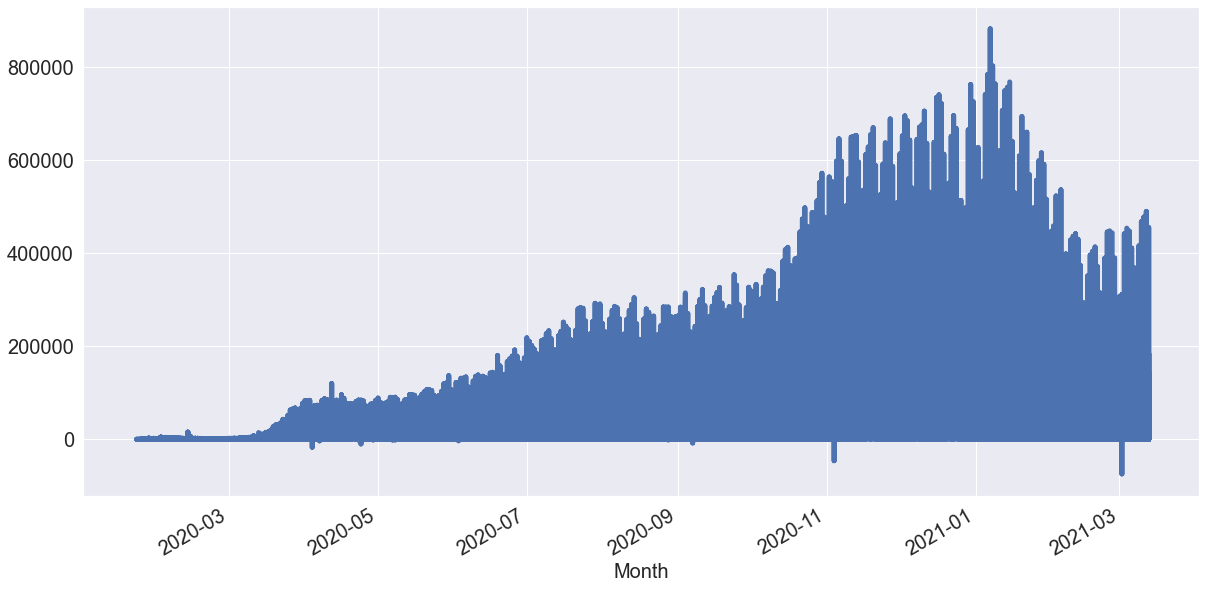

In [39]:
df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

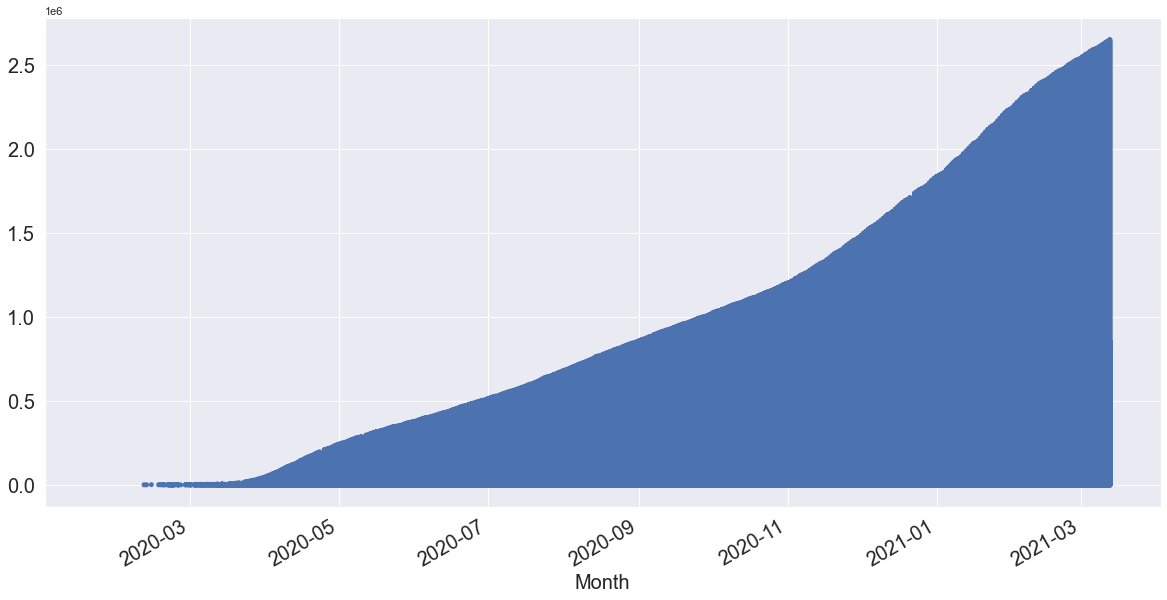

In [40]:
df1.total_deaths.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

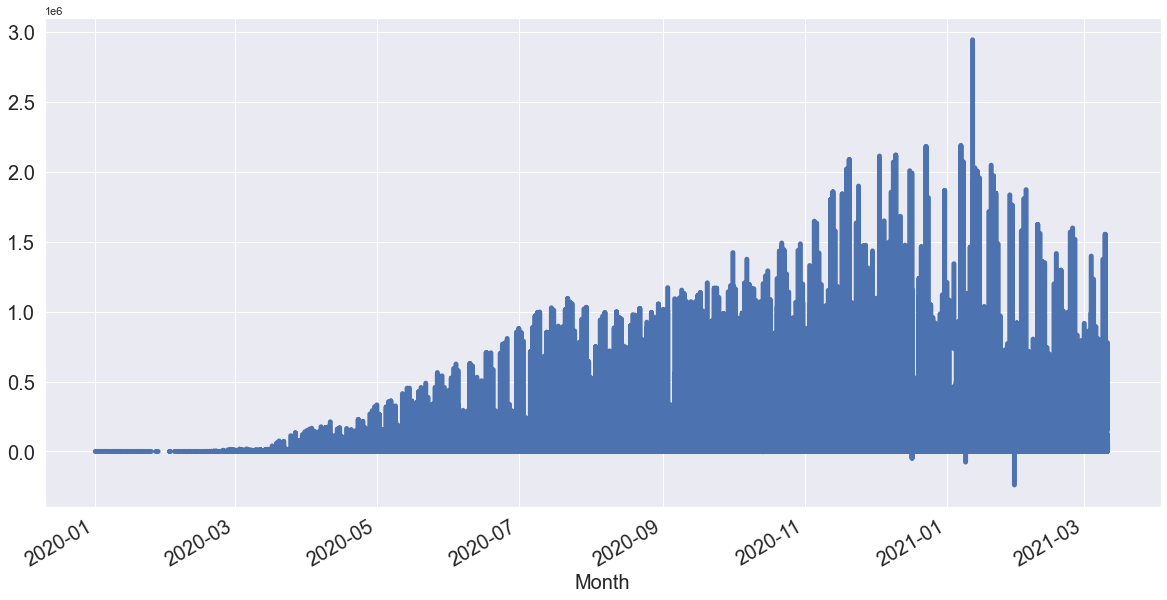

In [41]:
df1.new_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

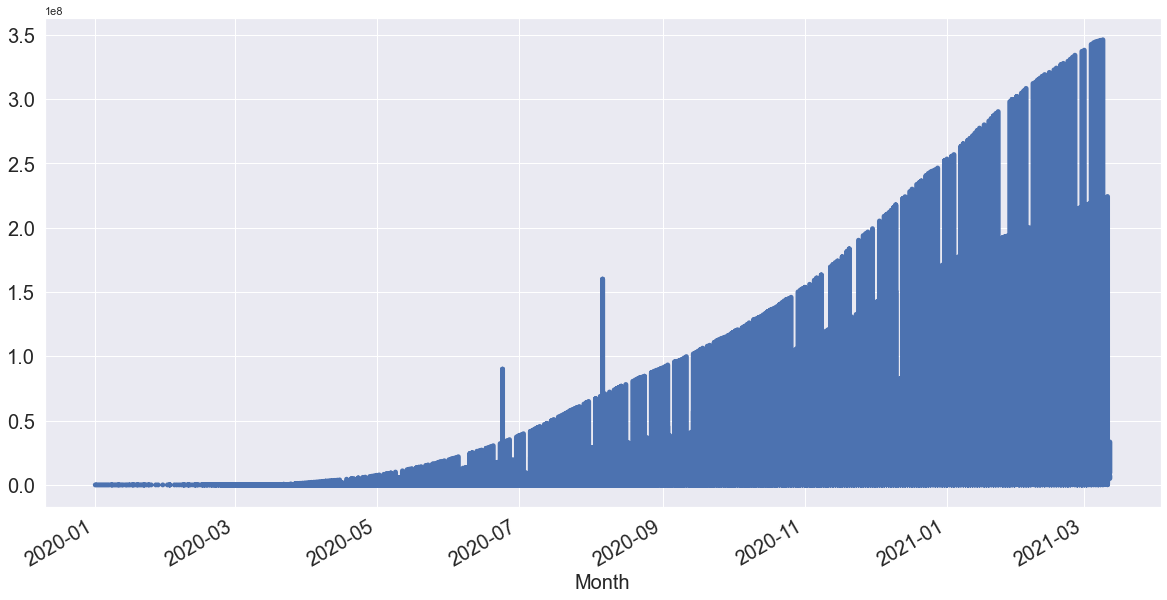

In [42]:
df1.total_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

### Trends and Seasonality in TimeSeries Data

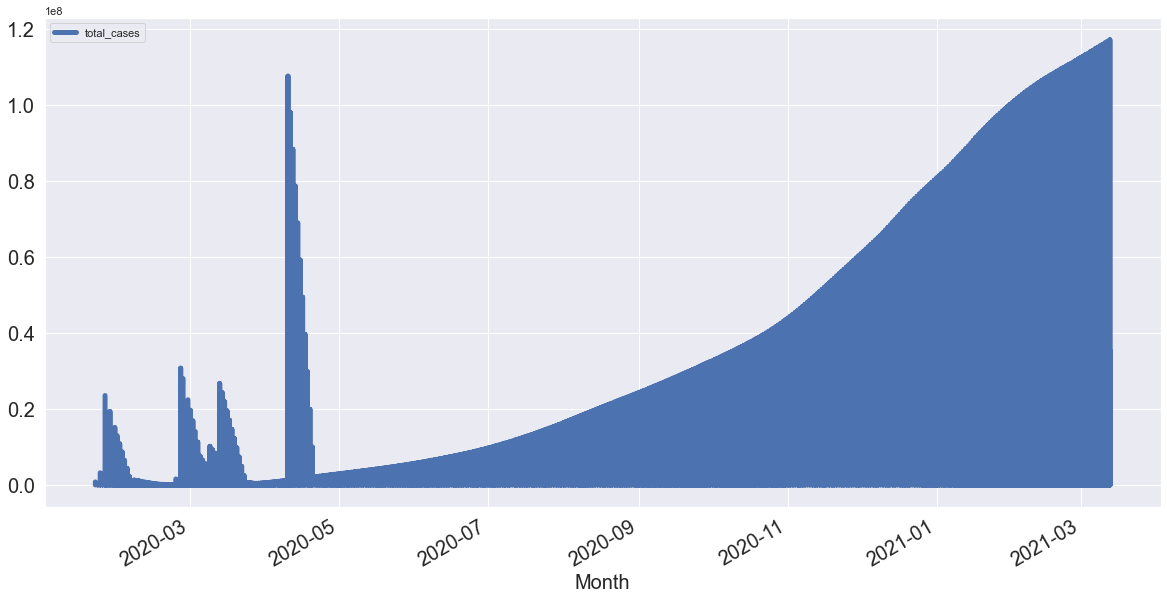

In [43]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

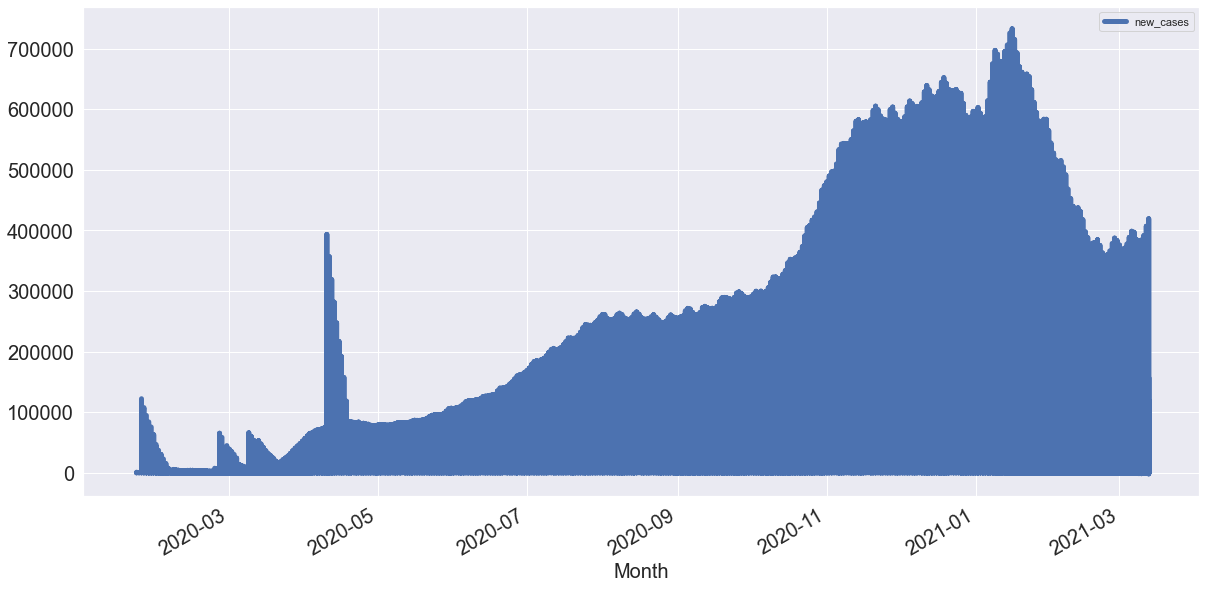

In [44]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

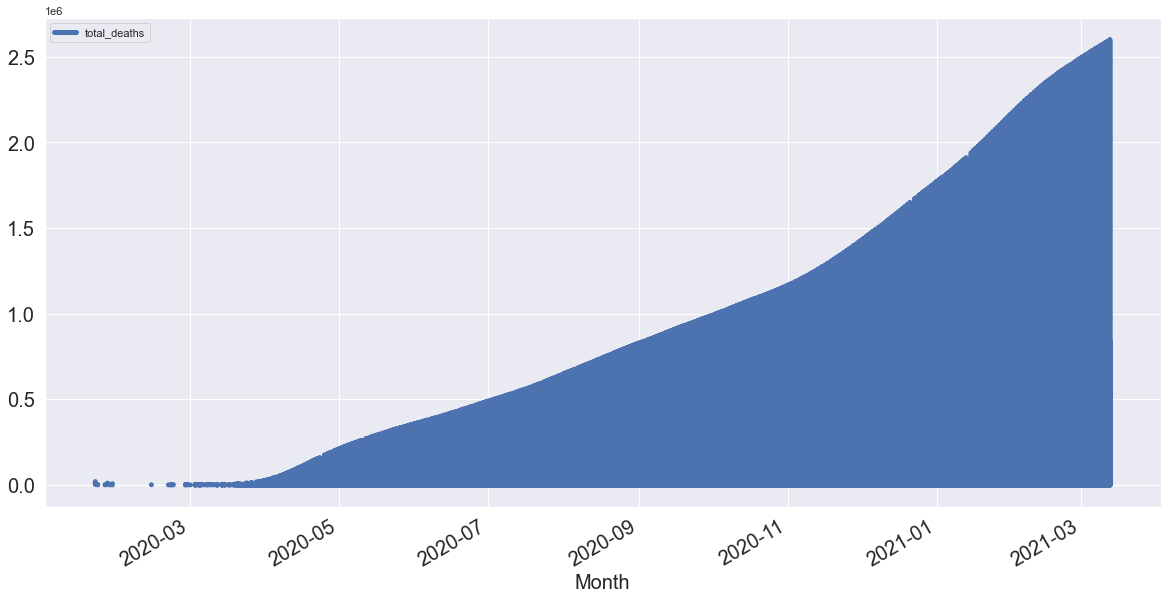

In [45]:
total_deaths = df1[['total_deaths']]
total_deaths.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

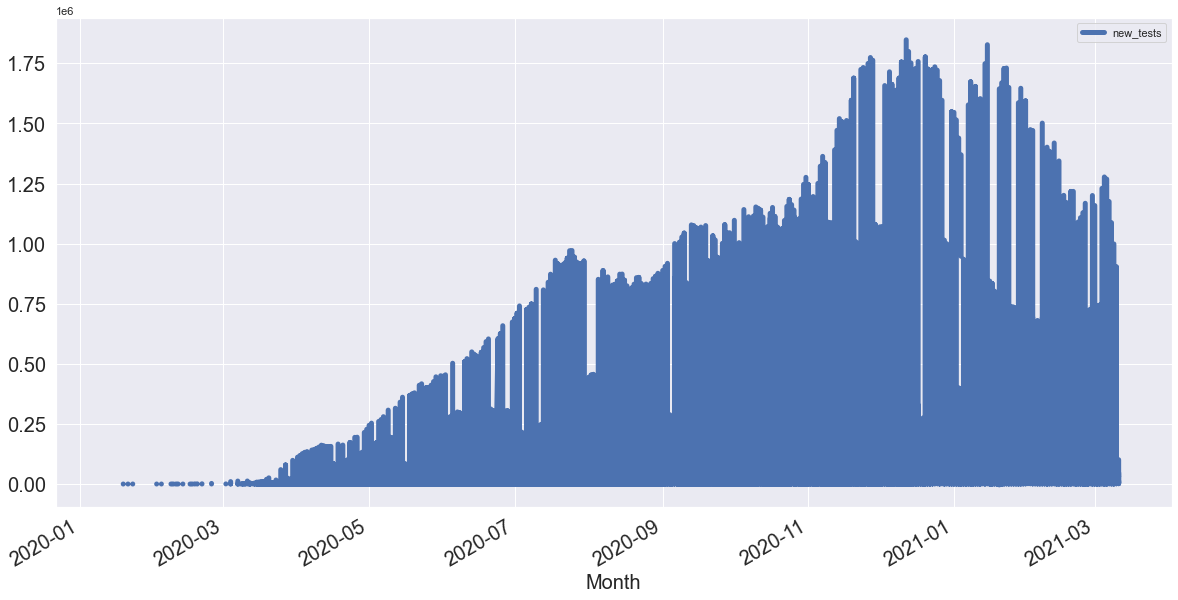

In [46]:
new_tests = df1[['new_tests']]
new_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

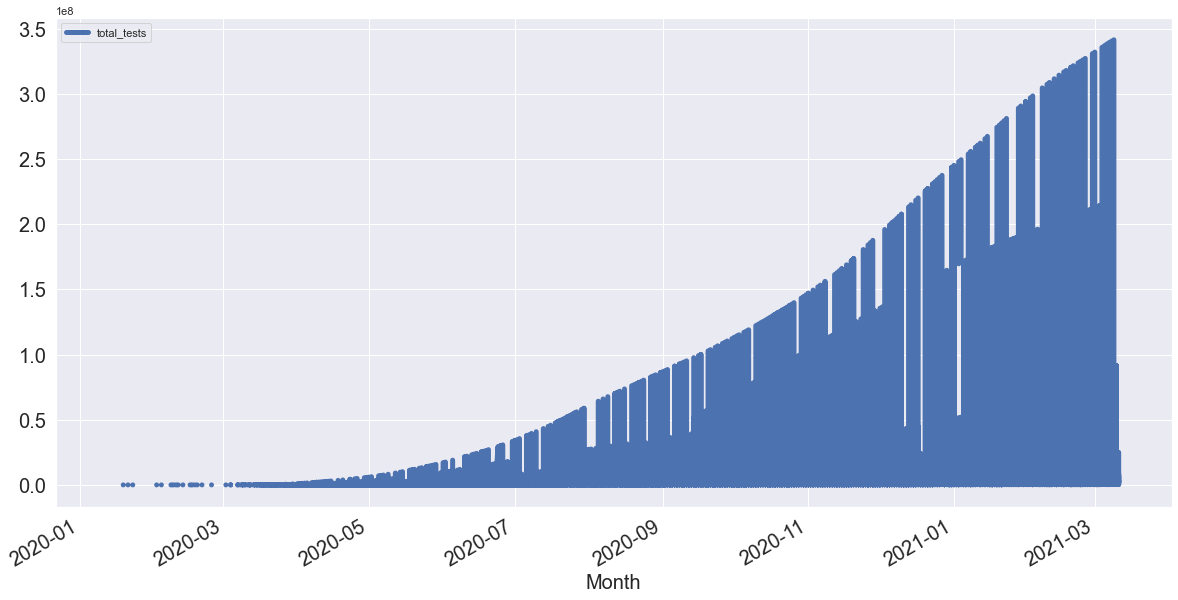

In [47]:
total_tests = df1[['total_tests']]
total_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

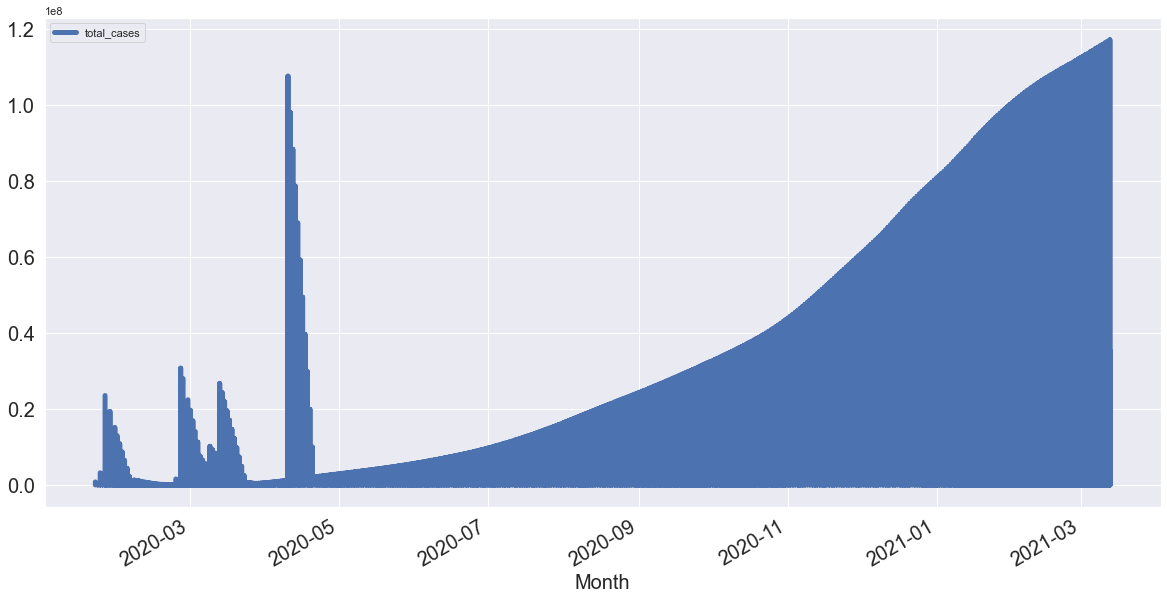

In [48]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

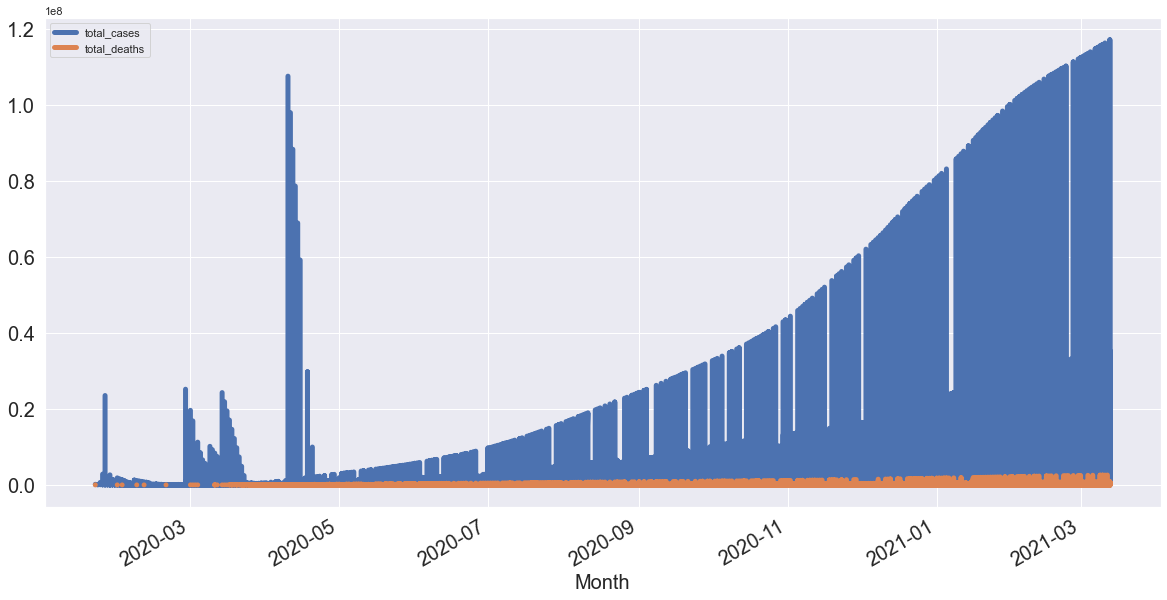

In [49]:
df_rm = pd.concat([total_cases.rolling(12).mean(), total_deaths.rolling(12).mean()])
df_rm.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

### Seasonal Patterns in Time Series Data

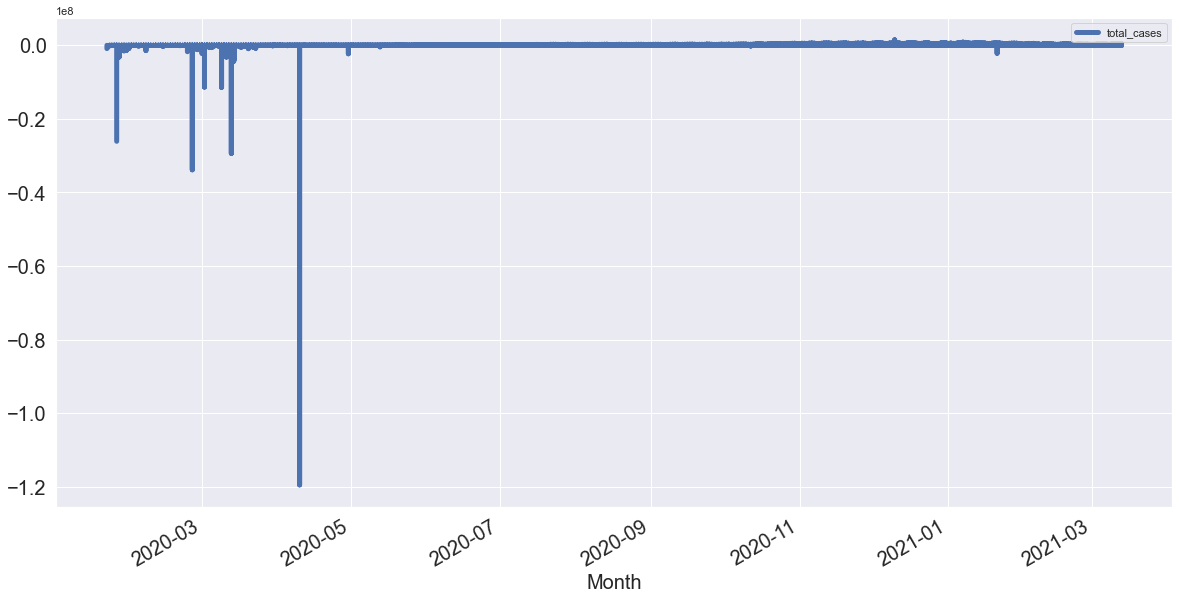

In [50]:
total_cases.diff().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20);